# Experimento #2
## Lâmpada Elétrica de Filamento

### Nome: João Vitor Rodrigues Baptista
### Matricula: 15/0013329

Objetivo: Caracterização elétrica de uma lâmpada de filamento com o levantamento da curva de corrente e
tensão. Compreensão do conceito de resistividade em metais como função da temperatura. Observação da
relação entre temperatura e a cor (espectro de emissão) do filamento.

Importando os dados

In [1]:
dict_data = {
    'Vdc[V]': [0, 1, 2, 3, 4, 5, 6, 7],
    'Va[V]': [0, 1.001, 2.00, 3.00, 4.00, 5.00, 6.00, 6.99],
    'Vb[V]': [0, 0.1406, 0.1951, 0.244, 0.290, 0.329, 0.364, 0.400],
    'Cor': ['Apagado','Apagado','Vermelho Tênue','Vermelho Alaranjado','Laranja','Amarelo','Amarelo Claro','Branco'] 
}

r2 = 1.00

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_df = pd.DataFrame.from_dict(dict_data)
data_df.head()

,Vdc[V],Va[V],Vb[V],Cor
0,0,0.000,0.0000,Apagado
1,1,1.001,0.1406,Apagado
2,2,2.000,0.1951,Vermelho Tênue
3,3,3.000,0.2440,Vermelho Alaranjado
4,4,4.000,0.2900,Laranja


Para fazer o preenchimento dos restantes dos dados será utilizados as seguintes formulas:

$$ V_{AB}[V] = V_{A}[V] - V_{B}[V]  $$


$$ I[A] = \frac{V_{B}[V]}{R_{2}} $$ 


$$ R_{1}[\Omega] = \frac{R_{2}(V_{A}[V] - V_{B}[V])}{V_{B}[V]} $$ 


$$ P_{1}[W] = \frac{V_{AB}[V]^{2}}{R_{1}[\Omega]} $$ 


In [4]:
def calculo_f(row, r2):
    '''Função para fazer o preenchimento dos dados completo da tabela'''
    try:
        Vab = row['Va[V]'] - row['Vb[V]']

        I = row['Vb[V]']/r2

        R1 = (r2*Vab)/row['Vb[V]']

        P1 = (Vab**2)/R1

        row['Vab[V]'] = Vab
        row['I[A]'] = I
        row['R1[OHMS]'] = R1
        row['P1[W]'] = P1
    
    except ZeroDivisionError:
        row['Vab[V]'] = 0
        row['I[A]'] = 0
        row['R1[OHMS]'] = 0
        row['P1[W]'] = 0
    
    return row

In [5]:
full_data_df = data_df.apply(lambda row : calculo_f(row, r2), axis = 1)

In [6]:
full_data_df

,Vdc[V],Va[V],Vb[V],Cor,Vab[V],I[A],R1[OHMS],P1[W]
0,0,0.000,0.0000,Apagado,0.0000,0.0000,0.000000,0.000000
1,1,1.001,0.1406,Apagado,0.8604,0.1406,6.119488,0.120972
2,2,2.000,0.1951,Vermelho Tênue,1.8049,0.1951,9.251153,0.352136
3,3,3.000,0.2440,Vermelho Alaranjado,2.7560,0.2440,11.295082,0.672464
4,4,4.000,0.2900,Laranja,3.7100,0.2900,12.793103,1.075900
5,5,5.000,0.3290,Amarelo,4.6710,0.3290,14.197568,1.536759
6,6,6.000,0.3640,Amarelo Claro,5.6360,0.3640,15.483516,2.051504
7,7,6.990,0.4000,Branco,6.5900,0.4000,16.475000,2.636000


#### 2) Obtenha o gráfico de pontos experimentais para curva I x V AB . Onde I é a corrente que passa pelo filamento e V AB = (V A -V B ) é o potencial sobre a lâmpada.

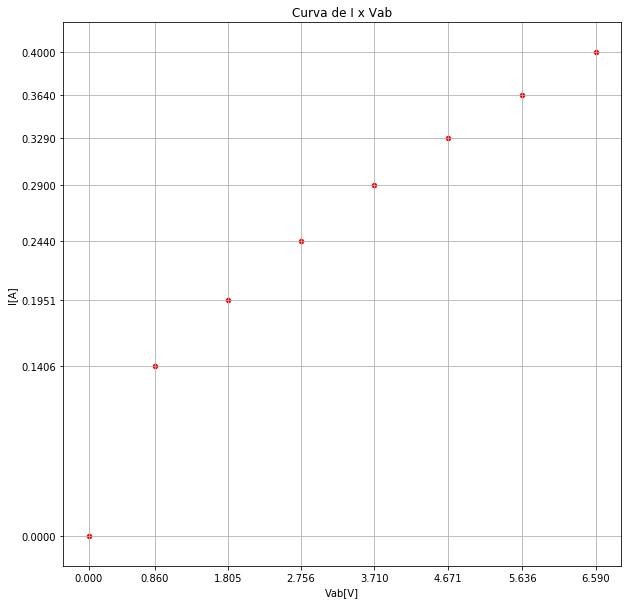

In [7]:
full_data_df.plot(kind='scatter',y='I[A]',x='Vab[V]',color='red', grid=True, title='Curva de I x Vab', legend=True, xticks=full_data_df['Vab[V]'], yticks=full_data_df['I[A]'], figsize=(10,10) )
plt.show()

#### 3) No mesmo gráfico do item-2, ajuste por mínimos quadrados os pontos experimentais e plote a curva de corrente x tensão (I x V AB ) do modelo da lâmpada incandescente. Explique se o modelo é adequado.

In [8]:
xc = np.linspace(min(full_data_df['Vab[V]']), max(full_data_df['Vab[V]']), num=100)

In [9]:
# calculate polynomial
z = np.polyfit(x=full_data_df['Vab[V]'].values, y=(full_data_df['I[A]'].values), deg=2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(min(full_data_df['Vab[V]']), max(full_data_df['Vab[V]']), num=100)
y_new = f(x_new)

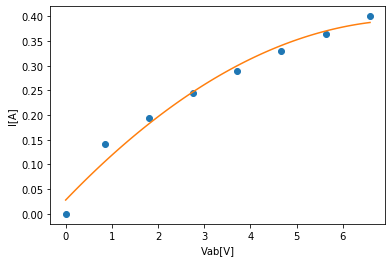

In [10]:
plt.plot(full_data_df['Vab[V]'], full_data_df['I[A]'],'o', x_new, y_new,)
plt.xlabel('Vab[V]')  
plt.ylabel('I[A]') 
plt.show()

Calculando o erro médio

In [11]:
f(full_data_df['Vab[V]'])

array([0.02808054, 0.10697454, 0.1825203 , 0.24689729, 0.29967943,
       0.34090948, 0.37025319, 0.38738523])

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

em  = mean_squared_error(full_data_df['I[A]'], f(full_data_df['Vab[V]']))

In [13]:
print('O root means foi de: ', em)

O root means foi de:  0.0003149491562068121


In [14]:
print('As constates quadraticas do modelo foram: ', z)

As constates quadraticas do modelo foram:  [-0.00648769  0.09727656  0.02808054]


## 4) Questionário:

#### a) Assumindo um espectro de radiação aproximadamente de corpo negro, calcule em que temperatura uma lâmpada incandescente deveria operar em uma máxima eficiência de iluminação para o olho humano.

A temperatura considerada como ideal seno visivel a olho humano é representada na equação 

$$ \lambda[max] = \frac{0.7 + 0.4}{2} = 0.55 [\mu m] $$ 

Como o \lambda[max]*T é considerado uma constate 2897.756 [\mu m.K]. Podemos dividir o cosiente pela constate e encontrar a temperatura:

$$ T = \frac{2897.756 [\mu m.K]}{0.55 [\mu m]} = 5268.6473 K $$ 

Não sendo totalmente eficiente visto que o valor de fusão dos filamentos de Tugstênio são de aproximadamente 3.695 K

#### b) Pesquisa: Qual a maior eficiência teórica que poderia ser obtida de lâmpadas com filamento incandescente de tungstênio comuns? Explique e cite as suas fontes

A maior eficiência encontrara em um filamento de Tungstêncio foi:

$$ \lambda[max] = \frac{2897.756 [\mu m.K]}{3695} K =  0.78 [\mu m] $$ 

## 5) Questões Complementares:

#### g) Verifique se o modelo físico-matemático I vs. V AB adotado neste experimento foi adequado, calculando a métrica de Erro Quadrático Médio (EQM).

Como o erro quadrado foi bastante pequeno é possivel assumir que o modelo de aproximação de metodos quadrados teve um resultado muito bom